In [1]:
import pandas as pd

# خواندن فایل CSV
df = pd.read_csv('synthetic_hand_motion_data.csv')

# نمایش اولین ردیف‌های داده
print("🧾 First 5 rows of the dataset:")
print(df.head())

# نمایش اطلاعات کلی درباره ویژگی‌ها
print("\n📊 Info about dataset:")
print(df.info())

# نمایش آمار توصیفی ویژگی‌های عددی
print("\n📈 Statistical summary:")
print(df.describe())

# نمایش تعداد مقادیر یکتا برای هر ستون (برای بررسی متغیرهای طبقه‌ای احتمالی)
print("\n🔍 Unique value counts per column:")
print(df.nunique())


🧾 First 5 rows of the dataset:
      acc_x     acc_y     acc_z  label
0  1.151395 -0.279748 -0.276819    1.0
1  0.621436 -0.094628 -0.213752    1.0
2  0.710843 -0.197842 -0.245857    1.0
3  1.360932 -0.120290 -0.562167    1.0
4  1.261405  0.109458 -0.201112    1.0

📊 Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acc_x   500 non-null    float64
 1   acc_y   500 non-null    float64
 2   acc_z   500 non-null    float64
 3   label   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB
None

📈 Statistical summary:
            acc_x       acc_y       acc_z      label
count  500.000000  500.000000  500.000000  500.00000
mean     0.451144    0.462633   -0.012018    1.65000
std      0.622447    0.614726    0.335007    0.65449
min     -1.454654   -1.675448   -1.336931    1.00000
25%     -0.038122   -0.016671   -0.202145    1.0000

In [2]:
df.head()

,acc_x,acc_y,acc_z,label
0,1.151395,-0.279748,-0.276819,1.0
1,0.621436,-0.094628,-0.213752,1.0
2,0.710843,-0.197842,-0.245857,1.0
3,1.360932,-0.120290,-0.562167,1.0
4,1.261405,0.109458,-0.201112,1.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6828\1249466706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='Set2')


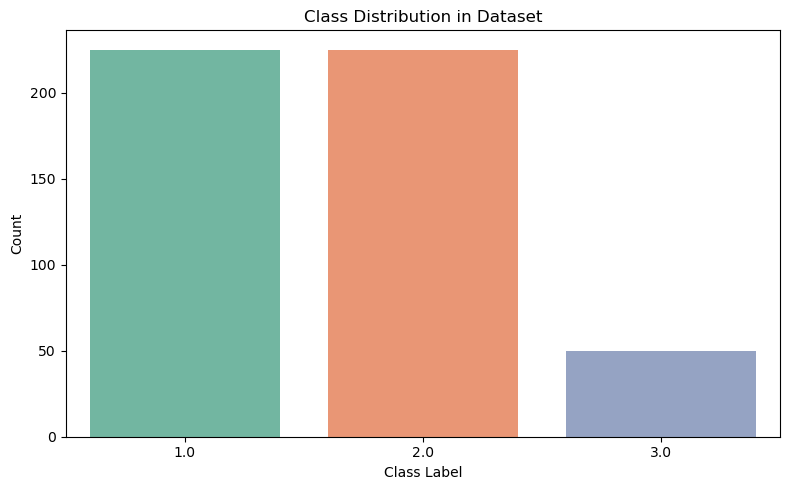

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=labels, palette='Set2')
plt.title("Class Distribution in Dataset")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# Step 1: Load the dataset
# -----------------------------
df = pd.read_csv("synthetic_hand_motion_data.csv")

# -----------------------------
# Step 2: Prepare features and labels
# -----------------------------
features = df.drop(columns=['label'])  # change 'label' to actual name of your target column
labels = df['label']

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

# -----------------------------
# Step 3: Euclidean distance
# -----------------------------
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# -----------------------------
# Step 4: KNN Classifier
# -----------------------------
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train.iloc[i]))
    
    # Sort by distance and get top k
    k_nearest = sorted(distances, key=lambda x: x[0])[:k]
    k_labels = [label for _, label in k_nearest]
    
    # Majority vote
    majority = Counter(k_labels).most_common(1)[0][0]
    return majority

# -----------------------------
# Step 5: Predict on test set
# -----------------------------
k = 5  # User-defined
y_pred = [knn_predict(X_train, y_train, x, k) for x in X_test]

# -----------------------------
# Step 6: Evaluation
# -----------------------------
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")


Confusion Matrix:
[[66  2  1]
 [ 3 56  4]
 [ 2  1 15]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94        69
         2.0       0.95      0.89      0.92        63
         3.0       0.75      0.83      0.79        18

    accuracy                           0.91       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.92      0.91      0.91       150


Accuracy: 0.91


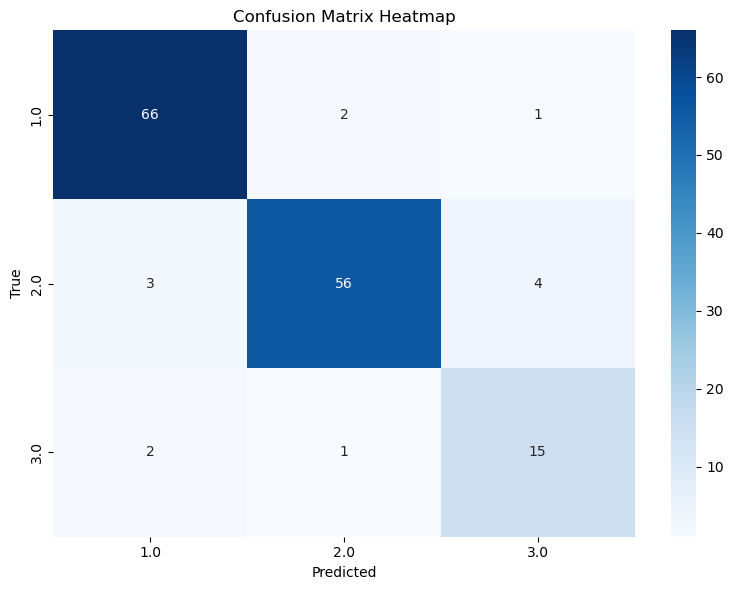

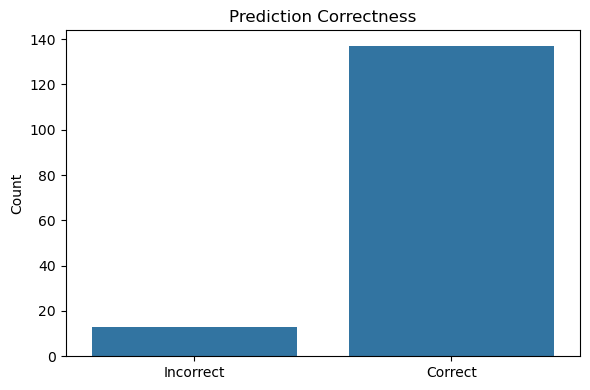

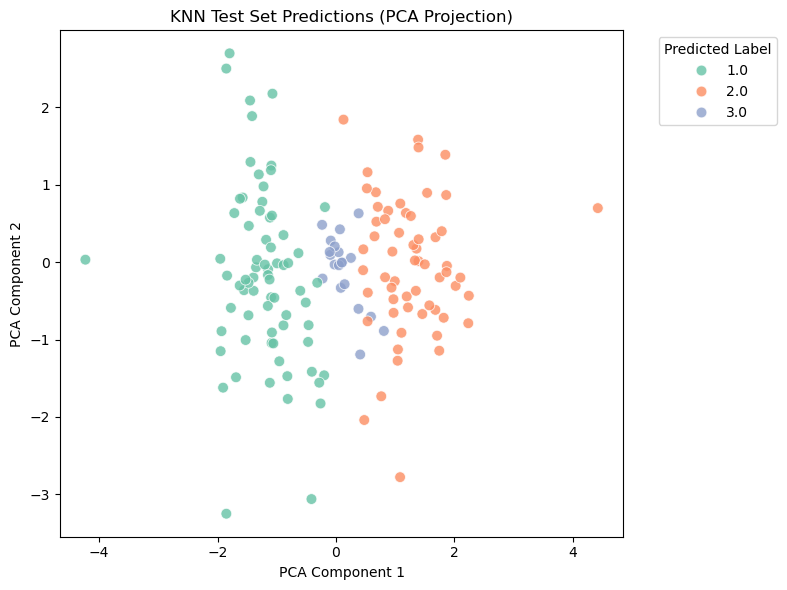

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 📌 Plot 1: Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 📌 Plot 2: Bar plot for correct vs incorrect predictions
correct = np.array(y_test) == np.array(y_pred)
plt.figure(figsize=(6, 4))
sns.countplot(x=correct)
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.title("Prediction Correctness")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 📌 Optional Plot 3: PCA 2D Projection of test set predictions
pca = PCA(n_components=2)
X_proj = pca.fit_transform(np.vstack((X_train, X_test)))
X_test_proj = X_proj[len(X_train):]  # only test points

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_proj[:, 0], y=X_test_proj[:, 1], hue=y_pred, palette="Set2", s=60, alpha=0.8)
plt.title("KNN Test Set Predictions (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


k = 1, Accuracy = 0.9133
k = 2, Accuracy = 0.9133
k = 3, Accuracy = 0.9200
k = 4, Accuracy = 0.9200
k = 5, Accuracy = 0.9133
k = 6, Accuracy = 0.9200
k = 7, Accuracy = 0.9200
k = 8, Accuracy = 0.9200
k = 9, Accuracy = 0.9200
k = 10, Accuracy = 0.9200
k = 11, Accuracy = 0.9200
k = 12, Accuracy = 0.9200
k = 13, Accuracy = 0.9200
k = 14, Accuracy = 0.9200
k = 15, Accuracy = 0.9133
k = 16, Accuracy = 0.9133
k = 17, Accuracy = 0.9133
k = 18, Accuracy = 0.9133
k = 19, Accuracy = 0.9133
k = 20, Accuracy = 0.9133


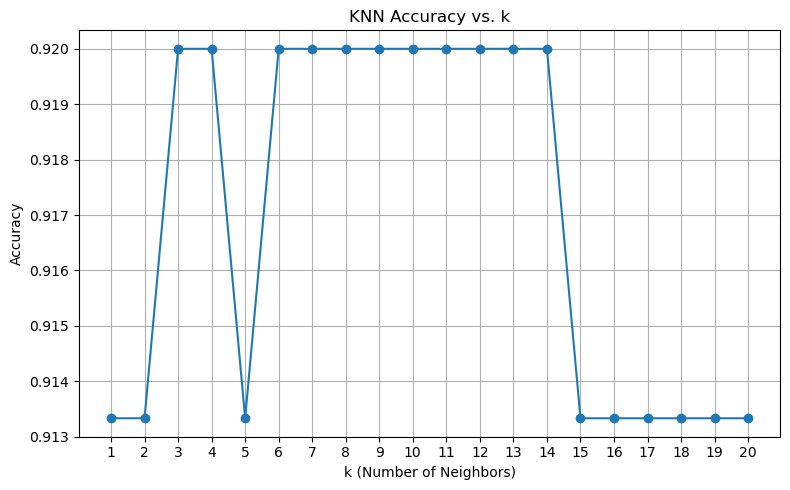

In [11]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  # Try k from 1 to 20
accuracies = []

for k in k_values:
    y_pred_k = [knn_predict(X_train, y_train, x, k) for x in X_test]
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plotting accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs. k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
def weighted_knn_predict(X_train, y_train, x_test, k, epsilon=1e-5):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train.iloc[i]))
    
    # Sort and get k nearest
    k_nearest = sorted(distances, key=lambda x: x[0])[:k]
    
    # Weighted voting
    class_weights = {}
    for dist, label in k_nearest:
        weight = 1 / (dist + epsilon)  # Avoid division by zero
        class_weights[label] = class_weights.get(label, 0) + weight
    
    return max(class_weights.items(), key=lambda x: x[1])[0]

# Predict with weighted KNN model_2
k = 5
y_pred_model2 = [weighted_knn_predict(X_train, y_train, x, k) for x in X_test]

# Evaluation
print("🔎 Classification Report (Weighted KNN - Model 2):")
print(classification_report(y_test, y_pred_model2))


🔎 Classification Report (Weighted KNN - Model 2):
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94        69
         2.0       0.95      0.89      0.92        63
         3.0       0.75      0.83      0.79        18

    accuracy                           0.91       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.92      0.91      0.91       150



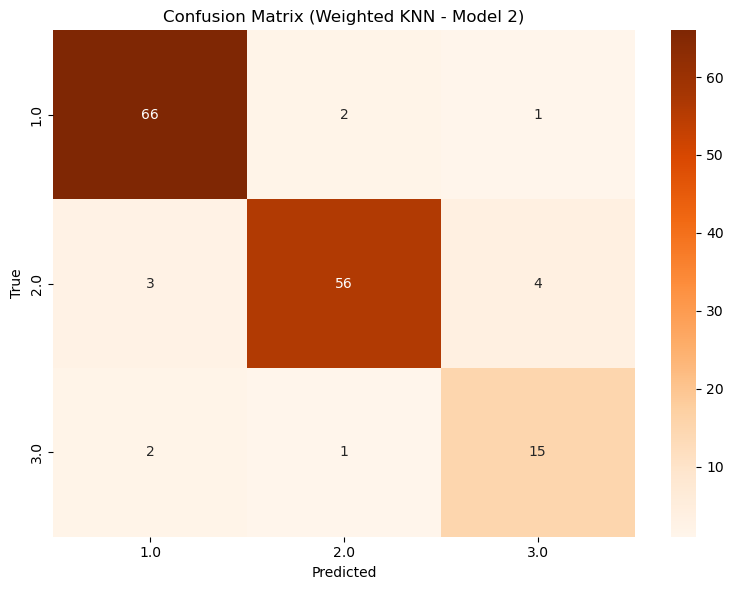

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_model2), annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Weighted KNN - Model 2)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


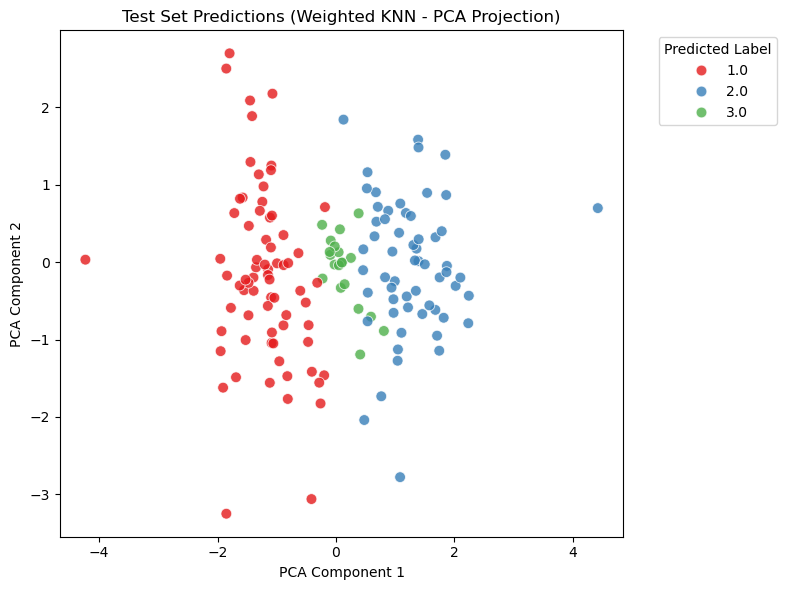

In [15]:
from sklearn.decomposition import PCA

# Reuse PCA fit from earlier or re-fit
pca = PCA(n_components=2)
X_proj_all = pca.fit_transform(np.vstack((X_train, X_test)))
X_test_proj = X_proj_all[len(X_train):]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_proj[:, 0], y=X_test_proj[:, 1], hue=y_pred_model2, palette="Set1", s=60, alpha=0.8)
plt.title("Test Set Predictions (Weighted KNN - PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Parameters
k_neighbors = 5
n_splits = 5  # 5-fold cross-validation

# Store results
accuracies_model1 = []
accuracies_model2 = []

# K-fold setup
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, test_index in skf.split(features_scaled, labels):
    X_train_cv, X_test_cv = features_scaled[train_index], features_scaled[test_index]
    y_train_cv, y_test_cv = labels.iloc[train_index], labels.iloc[test_index]

    # Model 1: Regular KNN
    y_pred_cv1 = [knn_predict(X_train_cv, y_train_cv, x, k_neighbors) for x in X_test_cv]
    acc1 = accuracy_score(y_test_cv, y_pred_cv1)
    accuracies_model1.append(acc1)

    # Model 2: Weighted KNN
    y_pred_cv2 = [weighted_knn_predict(X_train_cv, y_train_cv, x, k_neighbors) for x in X_test_cv]
    acc2 = accuracy_score(y_test_cv, y_pred_cv2)
    accuracies_model2.append(acc2)

# Print average performance
print("📊 Cross-Validation Results:")
print(f"Regular KNN (Model 1) - Mean Accuracy: {np.mean(accuracies_model1):.4f}")
print(f"Weighted KNN (Model 2) - Mean Accuracy: {np.mean(accuracies_model2):.4f}")


📊 Cross-Validation Results:
Regular KNN (Model 1) - Mean Accuracy: 0.9540
Weighted KNN (Model 2) - Mean Accuracy: 0.9560
